# A 1D Diffusion Model

Here we develop a 1D model of diffusion 
It assumes a constant diffusivity
IT uses a regular grid.
It has a step function for an initial condition.
It has fixed boundary conditions.


The diffusion equation:
$$ \frac{\partial C}{\partial t} = D\frac{\partial^2 C}{\partial x^2} $$


The discretized version of the diffusion equation we'll solve with our model:
$$ C^{t+1}_x = C^t_x + {D \Delta t \over \Delta x^2} (C^t_{x+1} - 2C^t_x + C^t_{x-1}) $$

This is the FTCS scheme described in various textbooks. (Also Wikipedia)

We'll use two libraries, NuPy (for arrays) and Matplotlib (for plots), that aren't part of the core Python LIbrary.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

Start by setting two fixed model parameters, the diffusivity and the size of the model doamin.

In [26]:
D = 100
Lx =300

In [27]:
dx = 0.5
x = np.arange(start=0, stop=Lx, step = dx)
nx =  len(x)

set up the initial conditions for the model.
The concentraiton 'C' is a step function with a high value on the left, a low value on the right, and the step at the center of the domain.

In [28]:
C = np. zeros_like(x)
C_left =  500
C_right =  0
C[x <= Lx//2] = C_left
C[x > Lx//2] = C_right

Plot the initial concenttratuin profile.

Text(0.5, 1.0, 'Initial Concentration profile')

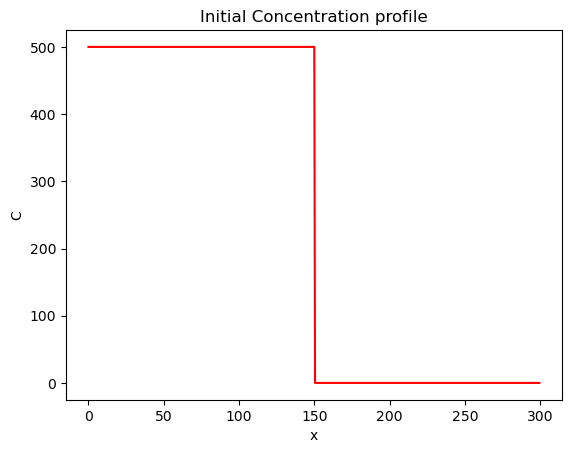

In [29]:
plt.figure()
plt.plot(x,C, "r")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Initial Concentration profile")

Set the number of time steps in the model.
Calculate a stable time step using a stabillity criterion.


In [30]:
nt = 5000
dt = 0.5 * dx **2 /D

In [31]:
dt

0.00125

Loop over the time steps if the model,
solving the diffusion equation using the FTCS scheme described above. 
Note the use of array operations on the concentraion `C`.
THe boundary cinditions remain ficed in each time step

In [32]:
for t in range(0, nt):
	C[1:-1] += D * dt / dx ** 2 * (C[:-2] - 2*C[1:-1] + C[2:])

plot the result

Text(0.5, 1.0, 'Final Concentratuin Profile')

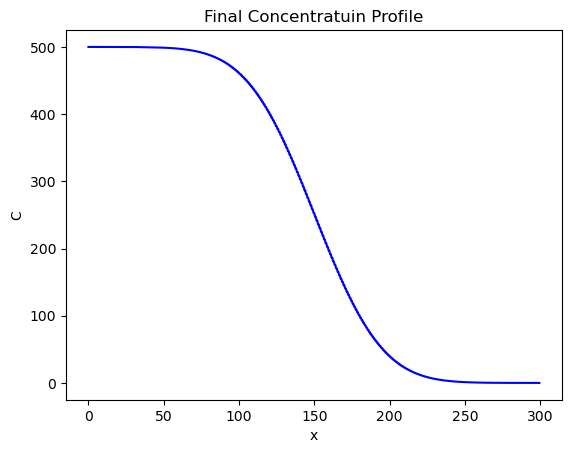

In [33]:
plt.figure()
plt.plot(x, C, "b")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Final Concentratuin Profile")